In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

In [2]:
df = pd.read_csv('df_final_2.csv')

In [3]:
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

In [4]:
X = pd.get_dummies(X, drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
xgb_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # handle imbalance
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=4))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

              precision    recall  f1-score   support

           0     0.9905    0.9562    0.9731   1176226
           1     0.8241    0.9573    0.8857    252071

    accuracy                         0.9564   1428297
   macro avg     0.9073    0.9567    0.9294   1428297
weighted avg     0.9611    0.9564    0.9576   1428297

AUC-ROC: 0.9924


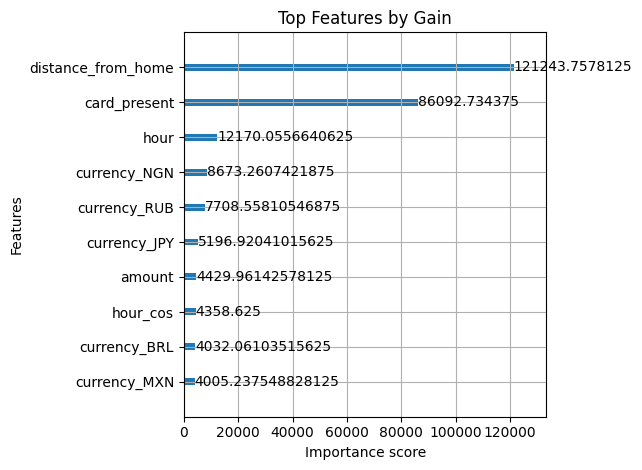

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top Features by Gain")
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open("XGBoost_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [ ]:
import joblib
joblib.dump(xgb_model, "XGBoost_model.joblib")

['XGBoost_model.joblib']